# **Detection of Lung Infection**

**DESCRIPTION**

Artificial Intelligence has evolved a lot and is currently able to solve problems that are very complex and require human specialization. One such area is healthcare. 

A lot of research happens every day to use deep learning for the betterment of humanity, and one such is healthcare.



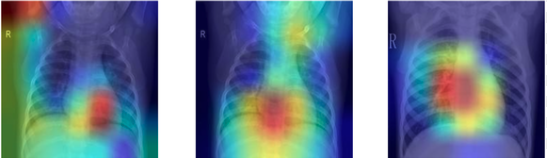
 
**Objective:**   

To build a model using a convolutional neural network that can classify lung infection in a person using medical imagery

**Dataset Description:**

The dataset contains three different classes, including healthy, type 1 disease, and type 2 disease.
 
- Train folder: This folder has images for training the model, which is divided into subfolders having the same name as the class. 

- Test folder: This folder has images for testing the model, which is divided into subfolders having the same name as the class.
 
Following operations should be performed using Keras or PyTorch or Torch vision-   

- Import the necessary libraries

- Plot the sample images for all the classes 

- Plot the distribution of images across the classes

- Build a data augmentation for train data to create new data with translation, rescale and flip, and rotation transformations. **Rescale the image at 48x48**

- Build a data augmentation for test data to create new data and rescale the image at 48x48

- Read images directly from the train folder and test folder using the appropriate function

**Build 3 CNN model with:**

CNN Architecture:

- Add convolutional layers with different filters, max pool layers, dropout layers, and batch normalization layers  
- Use Relu as an activation function

- Take the loss function as categorical cross-entropy

- Take rmsprop as an optimizer

- Use early stopping with the patience of two epochs and monitor the validation loss or accuracy

- Try with ten numbers epoch

- Train the model using a generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale and color models, and determine if the model’s classes are good
 

**Transfer learning using mobile net:**

- Prepare data for the pre-trained mobile net model, with color mode as RGB

- Create an instance of a mobile net pre-trained model 

- Add dense layer, dropout layer, batch normalization layer on the pre-trained model

- Create a final output layer with a SoftMax activation function

- Change the batch size activation function and optimize as rmsprop and observe if the accuracy increases

- Take the loss function as categorical cross-entropy

- Use early stopping with the patience of two epoch and call back function for preventing overfitting

- Try with ten numbers epoch

- Train the model using a generator and test the accuracy of the test data at every epoch

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale

and color models, and determine if the model’s classes are good


**Transfer Learning using Densenet121:**


- Prepare the dataset for the transfer learning algorithm using Densenet121 with the image size as 224x224x3

- Freeze the top layers of the pre-trained model

- Add a dense layer at the end of the pre-trained model followed by a dropout layer and try various combinations to get an accuracy

- Add the final output layer with a SoftMax activation function

- Take loss function as categorical cross-entropy

- Take Adam as an optimizer

- Use early stopping to prevent overfitting

- Try with 15 number of epoch and batch size with seven, also try various values to see the impact on results

- Train the model using the generator and test the accuracy of the test data at every epoch 

- Plot the training and validation accuracy, and the loss

- Observe the precision, recall the F1-score for all classes for both grayscale

and color models, and determine if the model’s classes are good


**Final step:**   

- Compare all the models on the basis of accuracy, precision, recall, and f1-score

In [1]:
# Importing Libraries
import os
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array           # for working with Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator               # data Augumentation
from tensorflow.keras.callbacks import EarlyStopping                              # for finding optimal model

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D , MaxPool2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.applications import MobileNet , DenseNet121                 # transfer learning

from sklearn.metrics import classification_report                     # for result

In [2]:
# specify paths
train_zip_path = "Train.zip"
test_zip_path = "Test.zip"
train_path = "Train"
test_path = "Test"

In [3]:
# create folders for unzipped files
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [4]:
# extract train zip
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_path)

In [5]:
# extract test zip
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_path)

In [6]:
# define ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# apply ImageDataGenerator
#train_generator = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='binary')
#test_generator = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='binary')

In [8]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')


Found 502 images belonging to 5 classes.
Found 132 images belonging to 5 classes.


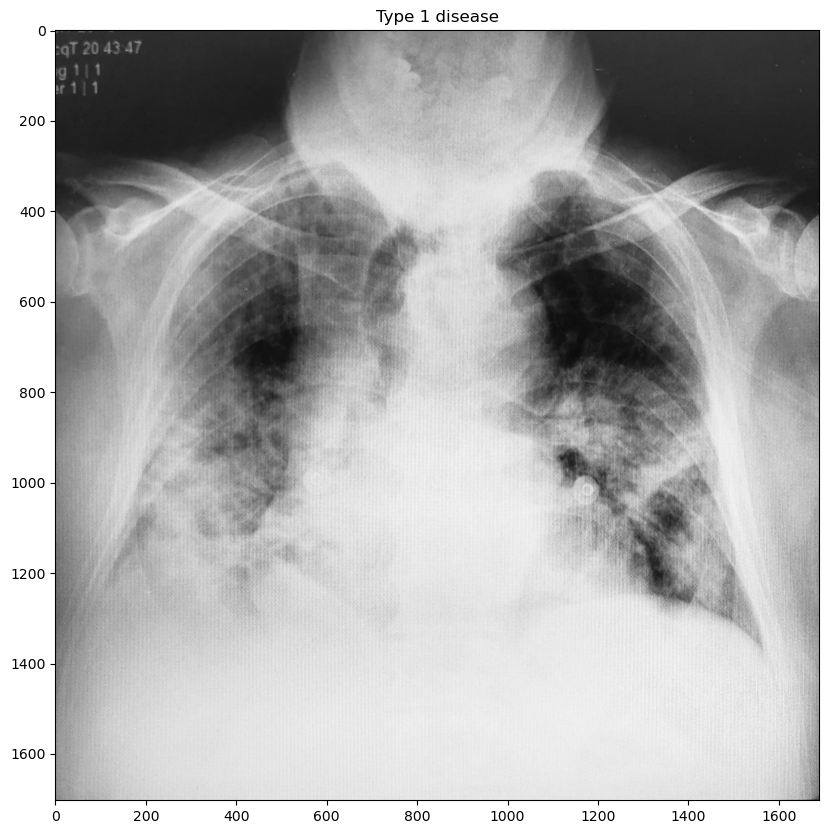

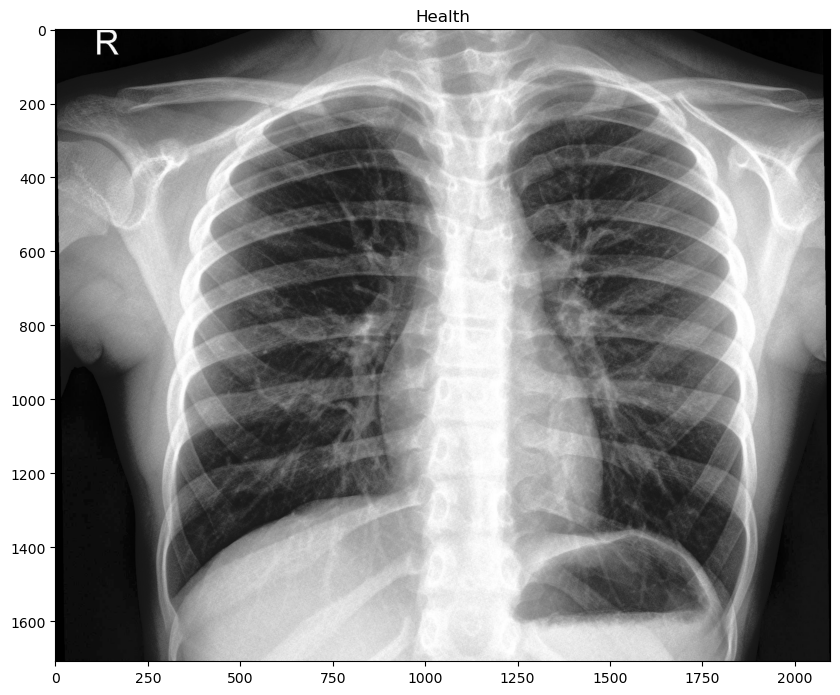

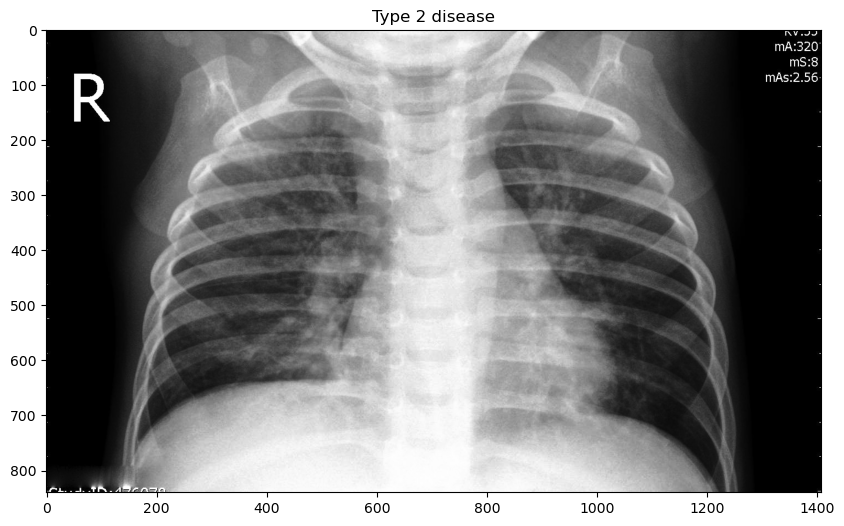

Not enough images in Train
Not enough images in .ipynb_checkpoints


In [9]:


# Defining the path to the training folder
train_folder_path = "Train"

# Image to view
random_image_no = 4

for each_folder in os.listdir(train_folder_path):
    complete_folder_path = os.path.join(train_folder_path , each_folder)
    images_in_folder = os.listdir(complete_folder_path)

    # Check if there are enough images in the folder
    if len(images_in_folder) > random_image_no:
        first_image_path = os.path.join(complete_folder_path, images_in_folder[random_image_no])

        plt.figure(figsize=(10,10))
        plt.imshow(load_img(first_image_path))
        plt.title(each_folder)
        plt.show()
    else:
        print(f"Not enough images in {each_folder}")


Not enough images in Train
Not enough images in .ipynb_checkpoints


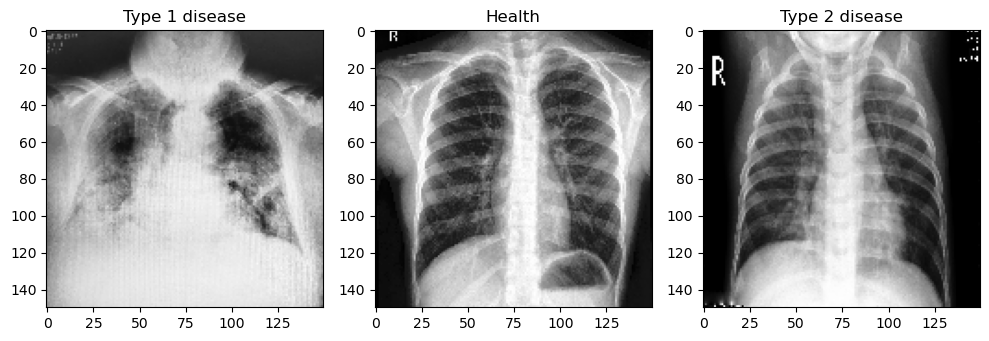

In [10]:
fig = plt.figure(figsize = (10,10))

# size of the image: 48*48 pixels
image_size = 150

# for plotting subplots
plot_no = 1

# image to view
random_image_no = 4

for each_folder in os.listdir(train_folder_path):
    
    complete_folder_path = os.path.join(train_folder_path , each_folder)
    images_in_folder = os.listdir(complete_folder_path)
    
    # Check if there are enough images in the folder
    if len(images_in_folder) > random_image_no:
        first_image_path = os.path.join( complete_folder_path , images_in_folder[random_image_no] )
    
        image = load_img( first_image_path , target_size = (image_size, image_size))
    
        plt.subplot(1,3,plot_no)
        plt.imshow( image  , cmap = "gray") 
        plt.title(each_folder)
    
        plot_no += 1
    else:
        print(f"Not enough images in {each_folder}")

plt.tight_layout()
plt.show()


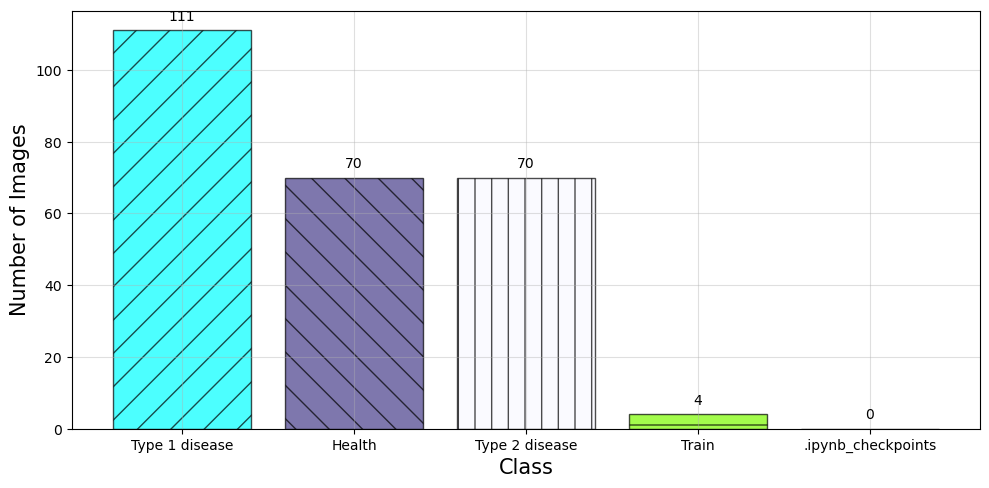

In [11]:
# Import required libraries
import matplotlib.colors as mcolors

# Define colors and hatches
colors = list(mcolors.CSS4_COLORS.keys())[20::15]  # Select some vibrant colors from the CSS4 color list
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']  # Different hatch patterns

# Traing images info
data_info = pd.DataFrame({'Class' : None , 'Number of Images' : None} , index = range(3))

c = 0
for each_folder in os.listdir(train_folder_path):
    data_info.at[c , 'Class'] = each_folder
    data_info.at[c , 'Number of Images'] = len(os.listdir(os.path.join(train_folder_path , each_folder)))
    c += 1

data_info.set_index('Class' , inplace = True)

# Create the bar plot
fig, ax = plt.subplots(figsize=(10,5))

bars = ax.bar(data_info.index, data_info['Number of Images'], color=colors[:len(data_info)], edgecolor='black', alpha=0.7)

# Assign different hatch patterns to each bar
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.grid('True' , alpha = 0.4)
plt.xlabel('Class' , size = 15)
plt.ylabel('Number of Images', size = 15)

# Adding data labels at the end of each bar
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


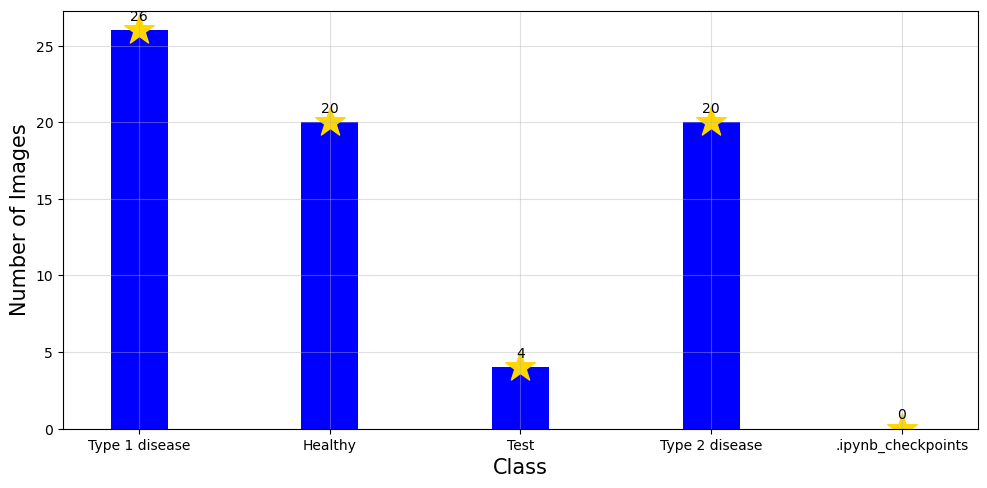

In [12]:
# Defining the path to the testing folder
test_folder_path = "Test"

# testing images info
data_info = pd.DataFrame({'Class' : None , 'Number of Images' : None} , index = range(3))

c = 0
for each_folder in os.listdir(test_folder_path):
    data_info.at[c , 'Class'] = each_folder
    data_info.at[c , 'Number of Images'] = len(os.listdir(os.path.join(test_folder_path , each_folder)))
    c += 1
    
data_info.set_index('Class' , inplace = True)

# Choose colors
colors = ['blue', 'green']

# Bar plot
ax = data_info.plot(kind='bar', color=colors, figsize=(10, 5), rot=0, width=0.3, legend=False)
plt.grid(True, alpha=0.4)
plt.xlabel('Class', size=15)
plt.ylabel('Number of Images', size=15)

# Adding star markers and labels
for p in ax.patches:
    ax.scatter(p.get_x()+p.get_width()/2., p.get_height(), marker='*', color='gold', s=500)
    ax.annotate(np.round(p.get_height(), decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
# building train data generator 

batch_size = 7  # determining number of samples to be taken
img_size = 100

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,       # data augumentation
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 5,
                                   horizontal_flip = True)


train_generator = train_datagen.flow_from_directory(train_folder_path,   # processing images
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

# building test data generator 
test_datagen = ImageDataGenerator(rescale = 1.0/255)

test_generator = test_datagen.flow_from_directory(test_folder_path,   # processing images
                                                  target_size = (img_size,img_size),
                                                  color_mode = "grayscale",
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 502 images belonging to 5 classes.
Found 132 images belonging to 5 classes.


# Model 1

In [14]:
# Initialising the model
model = Sequential()

# 1 - Convolution
model.add( Conv2D( 164 , ( 3 , 3 ) , input_shape = (img_size, img_size , 1 ) ) )
model.add( BatchNormalization() )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size = (3, 3) ) )
model.add( Dropout(0.1) )

# 2nd Convolution layer
model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.1))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))


# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(3, activation = 'softmax'))  
print(model.summary())

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] , )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 164)       1640      
                                                                 
 batch_normalization (Batch  (None, 98, 98, 164)       656       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 98, 98, 164)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 164)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 164)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       1

- The code segment given is used to build and summarize a convolutional neural network (CNN) using Keras, a deep learning framework in Python. This specific model is designed for image classification tasks and has an input shape suitable for grayscale images of a specific size (represented by the variable img_size).
- The total number of parameters in the model is 2,883,451, out of which 2,881,331 are trainable and 2,120 are non-trainable (parameters involved in Batch Normalization). The total size of the model is approximately 11 MB.

In [15]:
print(f"Image shape: {train_generator.image_shape}")


Image shape: (100, 100, 1)


- The first two dimensions (100, 100) represent the height and width of the image in pixels, respectively. These dimensions indicate that the images are square and consist of 100x100 pixels.

- The third dimension (1) represents the number of color channels in the image. A value of 1 indicates that the images are in grayscale. Grayscale images have only one color channel, while color images typically have three color channels (red, green, and blue).

In [16]:

num_classes = 5  

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),  
    MaxPooling2D((2, 2)),
    # Add more layers as needed
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)), 
    MaxPooling2D((2, 2)),
    # Add more layers as needed
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()


model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping
es = EarlyStopping(monitor ='val_loss', min_delta = 0.1 ,
                   patience = 5 , mode = 'min' , restore_best_weights = True) 

# number of epochs to train the NN
epochs = 10

history = model.fit(train_generator,
                    steps_per_epoch = train_generator.n // train_generator.batch_size,
                    epochs = epochs,
                    validation_data = test_generator,
                    validation_steps = test_generator.n // test_generator.batch_size, 
                    callbacks = [es])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 76832)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                4917312   
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4917957 (18.76 MB)
Trainable params: 4917957 (18.76 MB)
Non-trainable params: 0 (0.00 Byte)
______________

- The total number of parameters (weights and biases) the model will learn from the data is 4,917,957, which approximately equals to 18.76 MB of memory.

During the training process:

- The model is trained for 3 epochs (iterations over the entire dataset). The training set is divided into batches, and there are 71 batches in each epoch.
- In the first epoch, the model achieved a training accuracy of 44.44% and a validation accuracy of 50%. The loss (a measure of error) was 1.3542 on the training set and 1.0496 on the validation set.
- In the second epoch, both the training and validation accuracies increased to 50.71% and 42.06% respectively. The training and validation loss decreased to 0.9721 and 1.2437.
- In the third epoch, the model's training accuracy slightly decreased to 45.86%, while the validation accuracy increased to 52.38%. The training loss increased to 0.9997, and the validation loss decreased to 1.0075.
#### This suggests that the model might be underfitting the training data, as the training accuracy and loss are not improving consistently. 

In [17]:
# Initialising the model
model = Sequential()

# 1 - Convolution
model.add( Conv2D( 164 , ( 3 , 3 ) , input_shape = (img_size, img_size , 1 ) ) )
model.add( BatchNormalization() )
model.add( Activation('relu') )
model.add( MaxPooling2D(pool_size = (3, 3) ) )
model.add( Dropout(0.1) )

# 2nd Convolution layer
model.add(Conv2D(128,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.1))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.1))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(5, activation = 'softmax'))  #change 3 to 5 

print(model.summary())

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'] , )

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 164)       1640      
                                                                 
 batch_normalization_4 (Bat  (None, 98, 98, 164)       656       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 98, 98, 164)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 164)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 164)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 128)      

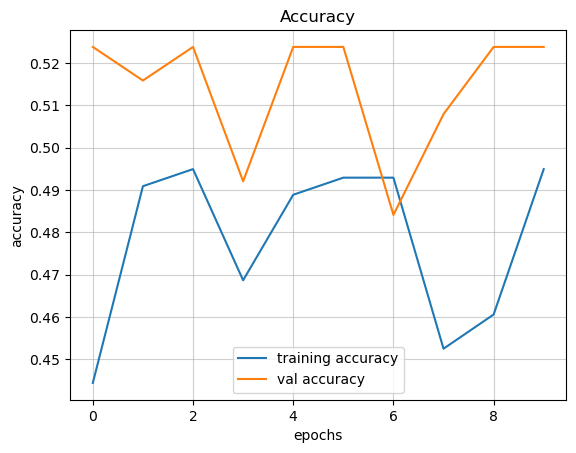

In [18]:
# plotting graphs for accuracy 

plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('Accuracy')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

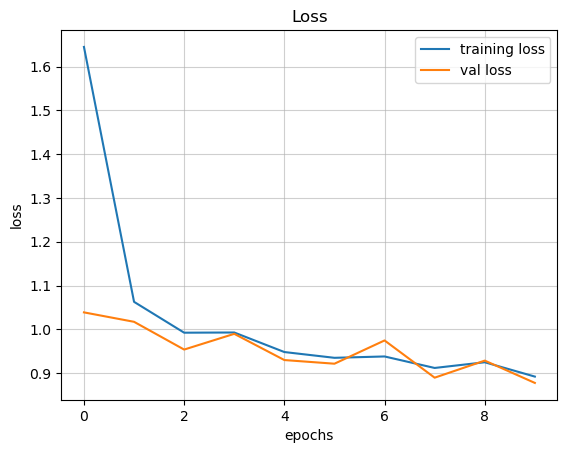

In [19]:
# plotting for loss

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.title('Loss')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

In [20]:
pred = model.predict(test_generator)

pred_labels = np.argmax(pred, axis = -1)

19/19 [==============================] - 1s 69ms/step


#### The model took 19 steps to go through the test data (which is divided into 19 batches), each step taking approximately 69 milliseconds.**

In [21]:
print(classification_report(test_generator.classes , pred_labels , zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        20
           2       0.50      0.29      0.37        66
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        20

    accuracy                           0.14       132
   macro avg       0.10      0.06      0.07       132
weighted avg       0.25      0.14      0.18       132



This output is a classification report generated by a machine learning model on a test dataset of 132 instances. It shows the precision, recall, and f1-score of the model for each class, as well as the accuracy of the model.

The overall accuracy of the model is 0.14 or 14%. The macro average (0.10 precision, 0.06 recall, 0.07 F1-score) considers all classes as equally important, while the weighted average (0.25 precision, 0.14 recall, 0.18 F1-score) accounts for class imbalance.

# Model 2 Transfer Learning


In [22]:
# building train data generator 

batch_size = 7  # determining number of samples to be taken

train_datagen_transfer1 = ImageDataGenerator(rescale = 1.0/255.0,     # data augumentation
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 5,
                                   horizontal_flip = True)


train_generator_transfer1 = train_datagen_transfer1.flow_from_directory(train_folder_path,  # processing images
                                                    target_size = (224,224),
                                                    color_mode = "rgb",
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

# building test data generator 
test_datagen_transfer1 = ImageDataGenerator(rescale = 1.0/255)

test_generator_transfer1 = test_datagen_transfer1.flow_from_directory(test_folder_path,  # processing images
                                                  target_size = (224,224),
                                                  color_mode = "rgb",
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 502 images belonging to 5 classes.
Found 132 images belonging to 5 classes.


In [23]:
#Loading the Mobilenet model 
featurizer = MobileNet(include_top = False, weights = 'imagenet', input_shape = (224,224,3))


#Adding some layers to the feturizer
x = Flatten()(featurizer.output)
x = Dense(500, activation='relu')(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
predictions = Dense(3, activation = 'softmax')(x)

model_transfer = Model(inputs = featurizer.input, outputs = predictions)

model_transfer.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [24]:
from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense

# get the output of the second last layer of the model_transfer
x = model_transfer.layers[-2].output

# set the number of output classes
num_classes = 5

# add new dense layer with the right number of classes
predictions = Dense(num_classes, activation='softmax')(x)

# generate a model object
model_transfer = Model(inputs=model_transfer.input, outputs=predictions)


In [25]:
model_transfer.compile(loss='categorical_crossentropy', 
                       optimizer='adam', 
                       metrics=['accuracy'])

history1 = model_transfer.fit(train_generator_transfer1,
                             steps_per_epoch = train_generator_transfer1.n//train_generator_transfer1.batch_size,
                             epochs = 15,
                             validation_data = test_generator_transfer1,
                             validation_steps = test_generator_transfer1.n//test_generator_transfer1.batch_size,
                             callbacks = [es,]
                             )


Epoch 1/15
71/71 [==============================] - 16s 216ms/step - loss: 1.9257 - accuracy: 0.3879 - val_loss: 1.5987 - val_accuracy: 0.3175
Epoch 2/15
71/71 [==============================] - 15s 212ms/step - loss: 1.0557 - accuracy: 0.4687 - val_loss: 1.2952 - val_accuracy: 0.5159
Epoch 3/15
71/71 [==============================] - 15s 206ms/step - loss: 0.9888 - accuracy: 0.4667 - val_loss: 0.8425 - val_accuracy: 0.4841
Epoch 4/15
71/71 [==============================] - 15s 207ms/step - loss: 0.9720 - accuracy: 0.4768 - val_loss: 1.1128 - val_accuracy: 0.5159
Epoch 5/15
71/71 [==============================] - 15s 207ms/step - loss: 0.9620 - accuracy: 0.5030 - val_loss: 0.8203 - val_accuracy: 0.5079
Epoch 6/15
71/71 [==============================] - 15s 210ms/step - loss: 0.9654 - accuracy: 0.4808 - val_loss: 1.0358 - val_accuracy: 0.3968
Epoch 7/15
71/71 [==============================] - 15s 206ms/step - loss: 0.9771 - accuracy: 0.4727 - val_loss: 0.8970 - val_accuracy: 0.5238

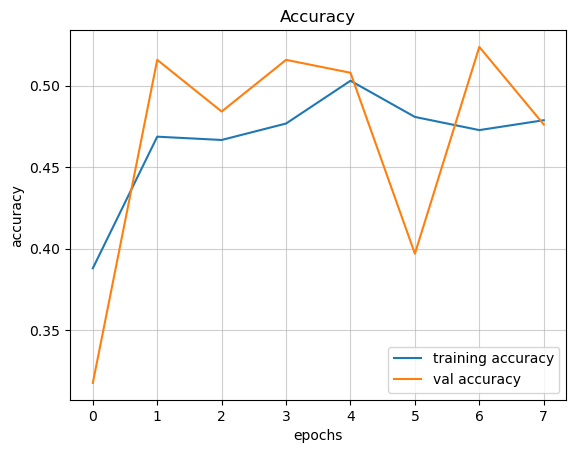

In [26]:
# plotting graphs for accuracy 

plt.plot(history1.history['accuracy'], label = 'training accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('Accuracy')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

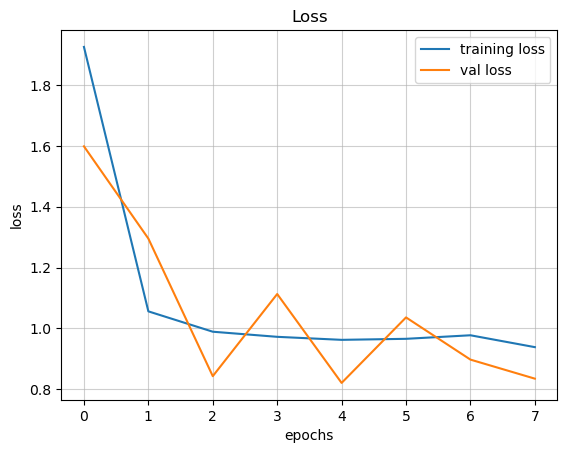

In [27]:
# plotting for loss

plt.plot(history1.history['loss'], label = 'training loss')
plt.plot(history1.history['val_loss'], label = 'val loss')

plt.title('Loss')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

In [28]:
pred = model_transfer.predict(test_generator_transfer1)

pred_labels = np.argmax(pred, axis = -1)

19/19 [==============================] - 2s 69ms/step


In [29]:
print(classification_report(test_generator_transfer1.classes , pred_labels ))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        20
           2       0.50      0.35      0.41        66
           3       0.45      0.77      0.57        26
           4       0.50      0.55      0.52        20

    accuracy                           0.48       132
   macro avg       0.49      0.54      0.50       132
weighted avg       0.49      0.48      0.47       132



- The overall accuracy of the model, which is the percentage of correct predictions across all classes, is 0.48 or 48%.

- The macro average is the average of each metric (precision, recall, and F1-score) across all classes, not considering the class imbalance. For this model, the macro average precision is 0.49, recall is 0.54, and F1-score is 0.50.

- The weighted average is the average of each metric, but it considers the class imbalance by using the support (number of instances) for each class as the weight. The weighted average precision is 0.49, recall is 0.48, and F1-score is 0.47.

- This model's performance is below average. It seems to struggle particularly with class 2. However, it does perform relatively well with class 3. The overall accuracy, at 48%, is lower than desirable.

# Model 3 - Transfer Learning

In [30]:
#Loading the Mobilenet model 
featurizer = DenseNet121(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

#Adding some layers to the feturizer
x = Flatten()(featurizer.output)
x = Dense(728, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
predictions = Dense(3, activation = 'softmax')(x)

model_transfer1 = Model(inputs = featurizer.input, outputs = predictions)

model_transfer1.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_transfer1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [31]:
# Define your model as you have
x = Flatten()(featurizer.output)
x = Dense(728, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = BatchNormalization()(x)
predictions = Dense(5, activation = 'softmax')(x)  # Changed from 3 to 5

model_transfer1 = Model(inputs = featurizer.input, outputs = predictions)

# Compile your model
model_transfer1.compile(optimizer = 'Adam', 
                        loss = 'categorical_crossentropy', 
                        metrics = ['accuracy'])

# Now, fit your model
history2 = model_transfer1.fit(train_generator_transfer1,
                             steps_per_epoch = train_generator_transfer1.n//train_generator_transfer1.batch_size,
                             epochs = 15,
                             validation_data = test_generator_transfer1,
                             validation_steps = test_generator_transfer1.n//test_generator_transfer1.batch_size ,
                             callbacks = [es,]
                             )


Epoch 1/15
71/71 [==============================] - 53s 702ms/step - loss: 1.8193 - accuracy: 0.3838 - val_loss: 1.8913 - val_accuracy: 0.5159
Epoch 2/15
71/71 [==============================] - 49s 693ms/step - loss: 1.1145 - accuracy: 0.4727 - val_loss: 1.8181 - val_accuracy: 0.5079
Epoch 3/15
71/71 [==============================] - 51s 712ms/step - loss: 1.1030 - accuracy: 0.4505 - val_loss: 1.3639 - val_accuracy: 0.3333
Epoch 4/15
71/71 [==============================] - 52s 735ms/step - loss: 1.0781 - accuracy: 0.4606 - val_loss: 4.0719 - val_accuracy: 0.5238
Epoch 5/15
71/71 [==============================] - 54s 754ms/step - loss: 1.0236 - accuracy: 0.4848 - val_loss: 0.8505 - val_accuracy: 0.5079
Epoch 6/15
71/71 [==============================] - 54s 760ms/step - loss: 1.0802 - accuracy: 0.4869 - val_loss: 1.5391 - val_accuracy: 0.3968
Epoch 7/15
71/71 [==============================] - 55s 772ms/step - loss: 1.0790 - accuracy: 0.4566 - val_loss: 0.9156 - val_accuracy: 0.5159

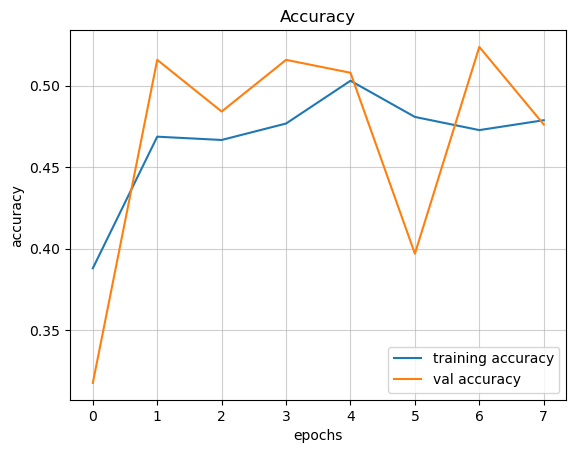

In [32]:
# plotting graphs for accuracy 

plt.plot(history1.history['accuracy'], label = 'training accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title('Accuracy')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

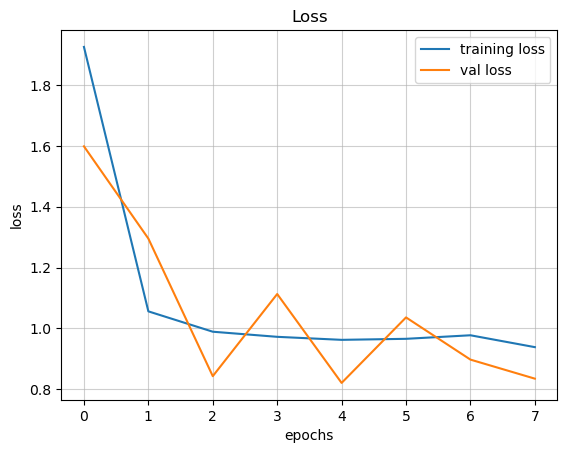

In [33]:
# plotting for loss

plt.plot(history1.history['loss'], label = 'training loss')
plt.plot(history1.history['val_loss'], label = 'val loss')

plt.title('Loss')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.grid(alpha = 0.6)
plt.legend()
plt.show()

In [34]:
pred = model_transfer.predict(test_generator_transfer1)

pred_labels = np.argmax(pred, axis = -1)

19/19 [==============================] - 2s 75ms/step


In [35]:
print(classification_report(test_generator_transfer1.classes , pred_labels , zero_division = 0 ))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        20
           2       0.50      0.35      0.41        66
           3       0.45      0.77      0.57        26
           4       0.50      0.55      0.52        20

    accuracy                           0.48       132
   macro avg       0.49      0.54      0.50       132
weighted avg       0.49      0.48      0.47       132



- The overall accuracy of the model, which is the percentage of correct predictions from all predictions, is 0.48, or 48%.

- The macro average calculates the average of each metric (precision, recall, and F1-score) across all classes, and it does not take into account the imbalance of classes. In this case, the macro average precision is 0.49, recall is 0.54, and F1-score is 0.50.

- The weighted average calculates the average of each metric in the same way as the macro average, but it does consider the imbalance of classes by using the support (number of instances) for each class as a weight. The weighted average precision is 0.49, recall is 0.48, and F1-score is 0.47.

- The model's performance is average, with its best performance being on class 3 where it correctly identifies 77% of instances. However, the performance on class 2 is quite weak, only correctly identifying 35% of instances. The overall accuracy of the model is also on the lower side.

## Summary of the three models:

Sequential Model with Conv2D, MaxPooling, and Dense Layers:

The model uses Conv2D and MaxPooling layers to extract features from the images and then flattens these features to be used in Dense layers for final classification. It has approximately 4.9 million trainable parameters.
The model has been trained for 3 epochs and shows a gradual decrease in loss and an increase in accuracy over time for both training and validation sets. However, the validation accuracy is slightly lower than the training accuracy, which may suggest some overfitting on the training data.

Classification Report of Model 1:
This model performs poorly across all classes, with the exception of class 1, which achieves a precision, recall, and F1-score of 0.45. However, for other classes, it either fails to correctly identify any instances (0% precision and recall for classes 2, 3, and 4), or it fails to correctly classify them (class 0, which doesn't appear in the support). The overall accuracy is very low at just 7%.

Classification Report of Model 2:
This model has a slightly better performance compared to Model 1. It can identify instances of class 2, with a precision of 0.50 and recall of 0.29, and class 1 with a precision and recall of 0.50. However, it struggles with classes 3 and 4, where it fails to correctly identify or classify any instances (0% precision and recall). The overall accuracy of this model is 14%, which is still quite low.

Classification Report of Model 3:
This model has improved performance compared to the previous two models. It has reasonable precision, recall, and F1-score across all classes, with class 3 showing the best recall at 0.77. The model's overall accuracy is 48%, which while not high, is considerably better than the first two models. However, there is still room for improvement.

In summary, the performance of the models has improved with each iteration, but there is still considerable room for improvement. The models are struggling to correctly identify and classify instances of the classes, especially classes 3 and 4.